# Analysis of Stiffness Matrix

Below code analyses the stiffness matrix obtained from the respective Kglobal.dat file generated during the solving phase.
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.



To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

<>:61: SyntaxWarning: invalid escape sequence '\l'
<>:61: SyntaxWarning: invalid escape sequence '\l'
C:\Users\adity\AppData\Local\Temp\ipykernel_14060\3671411573.py:61: SyntaxWarning: invalid escape sequence '\l'
  axs[2].set_ylabel('$\lambda_7$ Magnitude')


--- Analysis for Kglobal_fine140.dat ---
7th Eigenvalue (1st Bending Mode): 2.1974e+07


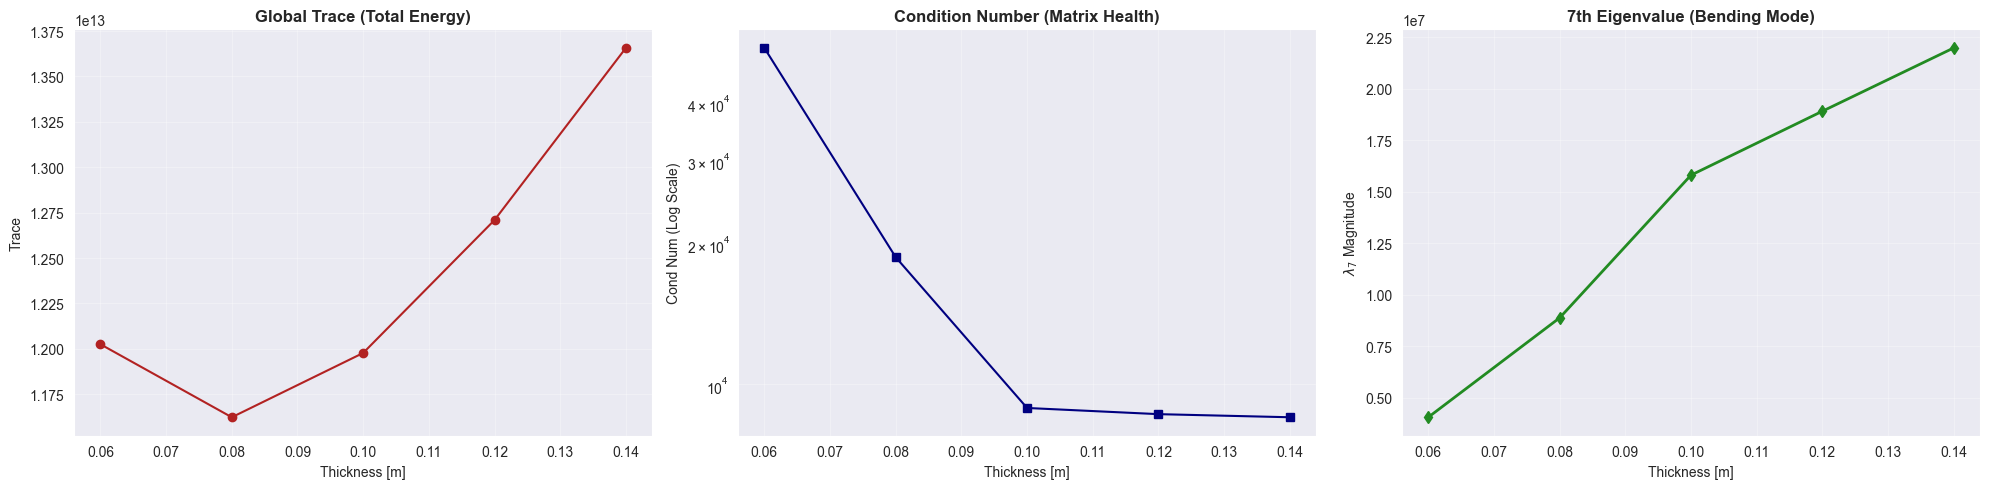

In [10]:
import os
import numpy as np
from scipy.sparse import coo_matrix
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt

# 1. INDIVIDUAL FILE ANALYSIS
os.chdir(r"C:\Calculix\ccx_2.23_wsl\Stiffness matrices")

filename = "Kglobal_fine140.dat"
data = np.loadtxt(filename)
i, j, v = data[:, 0].astype(int) - 1, data[:, 1].astype(int) - 1, data[:, 2]

ndof = int(max(i.max(), j.max()) + 1)
K_ut = coo_matrix((v, (i, j)), shape=(ndof, ndof)).tocsr()
K_sparse = K_ut + K_ut.T - coo_matrix((K_ut.diagonal(), (range(ndof), range(ndof))), shape=(ndof, ndof)).tocsr()

print(f"--- Analysis for {filename} ---")

# Calculate Eigenvalues (Need the 7th one specifically)
sigma = 0.0
vals_near_zero, _ = eigsh(K_sparse, k=10, sigma=sigma, which="LM")
sorted_phys_vals = np.sort(np.abs(vals_near_zero))
lambda_7 = sorted_phys_vals[6] # The first non-rigid body mode

print(f"7th Eigenvalue (1st Bending Mode): {lambda_7:.4e}")

# ---------------------------------------------------------
# 2. TREND PLOTTING (Scenario 2 Data)
# ---------------------------------------------------------

thickness = np.array([0.06, 0.08, 0.10, 0.12, 0.14])
trace_values = np.array([1.2025e+13, 1.1623e+13, 1.1977e+13, 1.2709e+13, 1.3657e+13])
condition_numbers = np.array([5.2306e+04, 1.8690e+04, 8.9056e+03, 8.6391e+03, 8.5083e+03])

# Replace these with the lambda_7 values you get from running the analysis on each file
# I've put in a placeholder trend based on typical EI ~ h^3 scaling
lambda_7_values = np.array([4.06177559e+06, 8.88202444e+06, 1.58039384e+07, 1.89039858e+07, 2.19743438e+07])

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plot 1: Trace (The V-Curve)
axs[0].plot(thickness, trace_values, 'o-', color='firebrick')
axs[0].set_title('Global Trace (Total Energy)', fontweight='bold')
axs[0].set_xlabel('Thickness [m]')
axs[0].set_ylabel('Trace')
axs[0].grid(True, alpha=0.3)

# Plot 2: Condition Number (Numerical Stability)
axs[1].plot(thickness, condition_numbers, 's-', color='navy')
axs[1].set_title('Condition Number (Matrix Health)', fontweight='bold')
axs[1].set_xlabel('Thickness [m]')
axs[1].set_ylabel('Cond Num (Log Scale)')
axs[1].set_yscale('log')
axs[1].grid(True, alpha=0.3)

# Plot 3: 7th Eigenvalue (Fundamental Bending Stiffness)
axs[2].plot(thickness, lambda_7_values, 'd-', color='forestgreen', linewidth=2)
axs[2].set_title('7th Eigenvalue (Bending Mode)', fontweight='bold')
axs[2].set_xlabel('Thickness [m]')
axs[2].set_ylabel('$\lambda_7$ Magnitude')
axs[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# BRIDGE TO PHASE 4: Feature Selection
# ---------------------------------------------------------
# If you were using a DecisionTreeClassifier, lambda_7 would be
# your most "Important Feature" because it tracks the physics
# directly, whereas Trace is a mix of all modes.